In [1]:
#     Load Data
#     Do profiling
#     write observation
#     impute NaN values
#     Nomalize the Data
#     multicollinearity
#     build model
#     save
#     get accuracy
#     check 10 test cases

In [2]:
import pandas as pd
df=pd.read_csv("./dataset/ai4i2020.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
def LabelEncoding(x):
    if x=="L":
        return 1
    elif x=="M":
        return 2
    elif x=="H":
        return 3

df["Type"]=df["Type"].apply(lambda x:LabelEncoding(x))
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
data=df.drop(["UDI","Product ID"],axis=1)
X=data.drop("Air temperature [K]",axis=1)
Y=data["Air temperature [K]"]

In [6]:
X.corr()

,Type,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
Type,1.000000,-0.012101,-0.003979,-0.003097,-0.007255,-0.036715,0.010977,-0.014719,-0.010026,-0.054486,0.001691
Process temperature [K],-0.012101,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.003979,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],-0.003097,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.007255,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.036715,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.010977,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.014719,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.010026,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273
OSF,-0.054486,0.004554,-0.104575,0.183465,0.155894,0.531083,0.038243,0.046396,0.115836,1.000000,-0.004341


<AxesSubplot:>

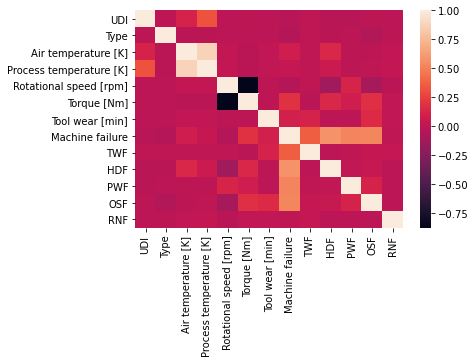

In [41]:
import seaborn as sns
sns.heatmap(df.corr(method="pearson"))
# we can clearly see that Machine failure is highly correlated with 'OSF',"HDF","PWF","TWF","RNF"
#Air Temperature and Process temperature are highly correlated


In [8]:
#checking for multicollinearity
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
# using VIF to find the highly correlated features
def get_VIF(X):
    VIF_score=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    #getting columns which have more than 5 VIF score
    VIF_score=np.array(VIF_score)
    #listing all the columns
    features=X.columns
    #getting higly correlated columns
    highly_correlated_features_scores=VIF_score

    VIF=pd.DataFrame([features,highly_correlated_features_scores],index=["name","VIF"]).T

    return VIF.sort_values(by=["VIF"],ascending=False)

print(get_VIF(X))
# so there are 7 features are highly correlated here
#VIF>5 is highly correlated


                       name         VIF
1   Process temperature [K]  781.514051
2    Rotational speed [rpm]  381.028982
3               Torque [Nm]   88.154937
5           Machine failure   12.245112
0                      Type    6.014756
7                       HDF    4.649017
4           Tool wear [min]    4.031247
8                       PWF    3.658126
9                       OSF     3.38201
6                       TWF    2.445034
10                      RNF    1.003372


In [9]:
#so we all know we can combine rpm and torque into new feature engine power
# so we will combine and create new feature to avoid multicollinearity without loosing info
X["engine power"]=X["Rotational speed [rpm]"]*X["Torque [Nm]"]
X.head(3)

,Type,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,engine power
0,2,308.6,1551,42.8,0,0,0,0,0,0,0,66382.8
1,1,308.7,1408,46.3,3,0,0,0,0,0,0,65190.4
2,1,308.5,1498,49.4,5,0,0,0,0,0,0,74001.2


In [10]:
#lets drop rpm and torque
X=X.drop(["Rotational speed [rpm]","Torque [Nm]","Type"],axis=1)
#now check the VIF
get_VIF(X)
#now we can see the multicollinearity is reduced somewhat


,name,VIF
0,Process temperature [K],40.51088
8,engine power,37.457627
2,Machine failure,12.204484
4,HDF,4.632242
1,Tool wear [min],4.03028
5,PWF,3.538179
6,OSF,3.38424
3,TWF,2.437547
7,RNF,1.00337


In [16]:
#since Machine failure is calculated from RNF,TWF,HDF,OSF,PWF we can keep machine failure and drop others
#since 
get_VIF(X.drop(['OSF',"HDF","PWF","TWF","RNF"],axis=1))

,name,VIF
0,Process temperature [K],39.597479
3,engine power,36.705157
1,Tool wear [min],3.922228
2,Machine failure,1.080296


<AxesSubplot:>

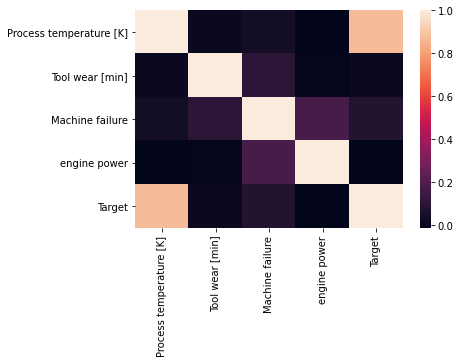

In [48]:
# lets check the which one have low correlation with target and try to drop it and check

temp=X.drop(['OSF',"HDF","PWF","TWF","RNF"],axis=1)
temp["Target"]=Y
sns.heatmap(temp.corr())
# process temperature highly correlated with Target
# engine power is less correlated with Target so we can remove it and check the VIF

In [49]:
# Since we removed duplicate features which lead to multicollinearity 
#we have now only one highly correlated value
# so we will try to remove that and check
#since Process temperature [K] is highy correlated with Target we cant remove it 
# but engine power is low correlated with Target
get_VIF(X.drop(["engine power",'OSF',"HDF","PWF","TWF","RNF"],axis=1))
# now we made the features without multicollinearity now apply changes and check the results

,name,VIF
1,Tool wear [min],3.92031
0,Process temperature [K],3.877038
2,Machine failure,1.046732


In [38]:
# without removing multicollinearity
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(scaled_X,Y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
train_score=lr.score(x_train,y_train)*100
test_score=lr.score(x_test,y_test)*100
train_score,test_score

(77.5002544063504, 77.64475791256787)

In [52]:
#with removed multicollinearity
# by removing duplicate and irrelevant features we are able to acheive the same result



from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
new_X=X.drop(['engine power','OSF',"HDF","PWF","TWF","RNF"],axis=1)
print(f"no of features reduced to {len(new_X.columns)}")
scaler=StandardScaler()
scaled_X=scaler.fit_transform(new_X)
x_train,x_test,y_train,y_test=train_test_split(scaled_X,Y,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
train_score=lr.score(x_train,y_train)*100
test_score=lr.score(x_test,y_test)*100
model_to_save=lr
train_score,test_score


no of features reduced to 3


(76.95685012372589, 77.15421102926507)

In [57]:
import pickle 
#saving model in pkl format
with open("A141.pkl","wb") as file:
    pickle.dump(model_to_save,file)
    print("saved successfully")

saved successfully


In [59]:
#loading the model

with open("A141.pkl","rb") as file:
    model=pickle.load(file)
    print("loaded successfully")
    print(f"score from loaded model:{model.score(x_test,y_test)}")

loaded successfully
score from loaded model:0.7715421102926507
